<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization ``(40 pt.)``

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [13]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [14]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [15]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [16]:
npR

array([[-1.1409, -0.6653, -0.62  , -1.0432, -0.7345],
       [ 0.    , -0.8291, -0.4948, -0.5799, -1.1407],
       [ 0.    ,  0.    , -0.1978, -0.1333, -0.0093],
       [ 0.    ,  0.    ,  0.    ,  0.3267, -0.3803],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.4809]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [17]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    #print("n=",n)
    for j in range(n):
        #print()
        #print("j=",j)
        Q[:,j] = A[:,j]
        for k in range(j):
            #print("k=",k)
            R[k,j] = np.dot(Q[:,k], A[:,j])
            Q[:,j] = Q[:,j] - R[k,j] * Q[:,k]
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] =  Q[:,j]/R[j,j]
    ##Your Code ends here
    return Q, R

In [18]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [19]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))


True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [20]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [21]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
        #print()
        #print("j=",j)
        V[:,j] = A[:,j]
        for k in range(j):
            #print("k=",k)
            R[k,j] = np.dot(Q[:,k], V[:,j])
            V[:,j] = V[:,j] - R[k,j] * Q[:,k]
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j]/R[j,j]
    ##Your Code ends here
    return Q, R

In [22]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [23]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [26]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=np.float64))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [27]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

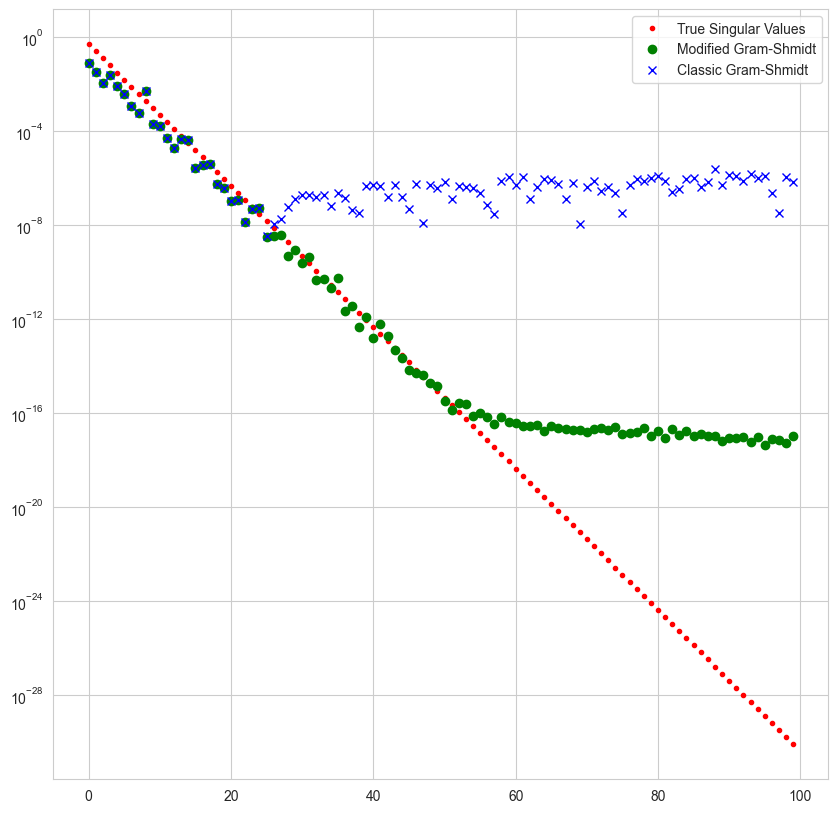

In [28]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [34]:
##Your Code start here
def QR_alg(A,iterations,steps):
    A0=np.copy(A)

    for i in range(iterations):
        Q,R = cgs(A0)
        A0 = R @ Q
        if i in steps:
            eig = np.diag(A0)
            eig = np.sort(eig)
            print("iteration =",i+1," :")
            print(eig)
            print()
pass
##Your Code ends here

In [36]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
print()
steps = [0,4,9,19,99]
QR_alg(A,100,steps)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

iteration = 1  :
[0. 2. 2. 3.]

iteration = 5  :
[-0.247   1.4541  2.7929  3.    ]

iteration = 10  :
[-0.247   1.4451  2.8019  3.    ]

iteration = 20  :
[-0.247   1.445   2.8019  3.    ]

iteration = 100  :
[-0.247   1.445   2.8019  3.    ]



##  Q2. SVD & Image processing ``(30 pt.)``

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


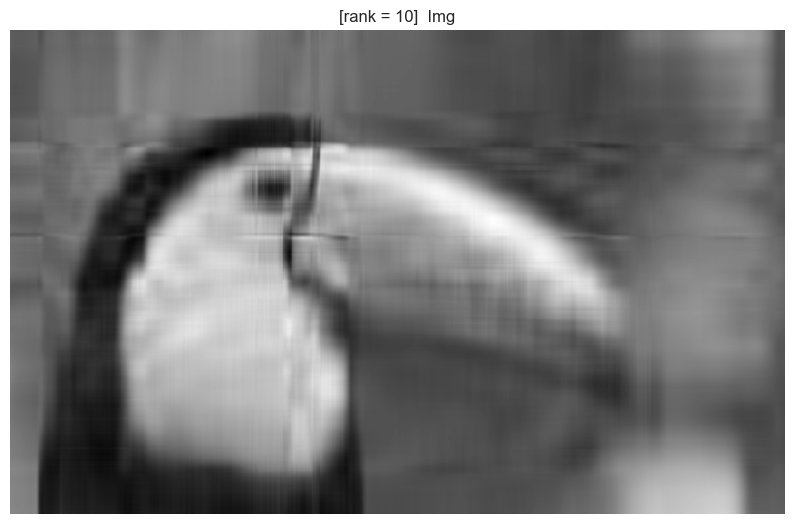

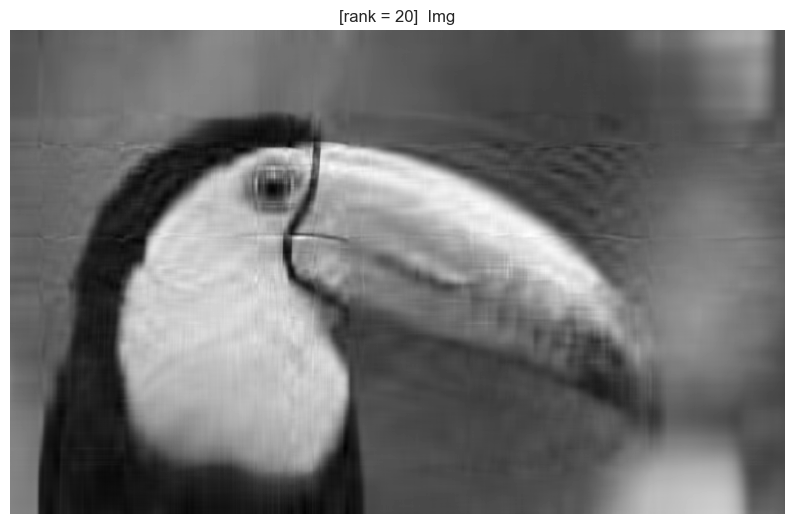

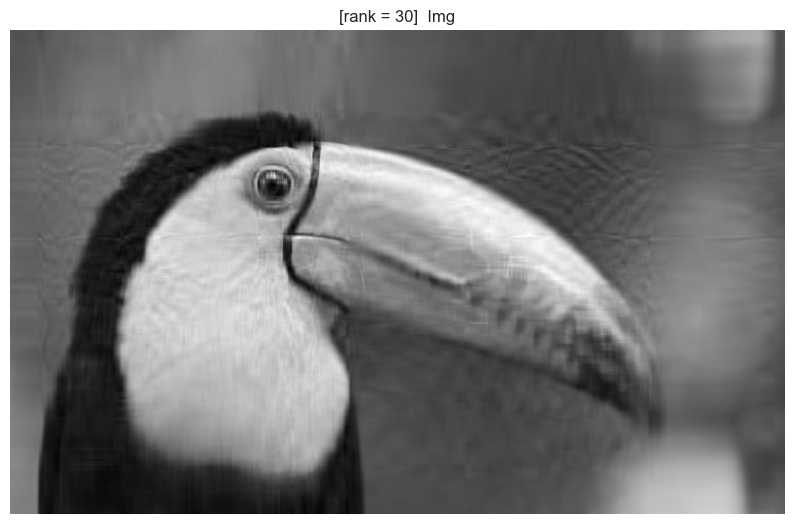

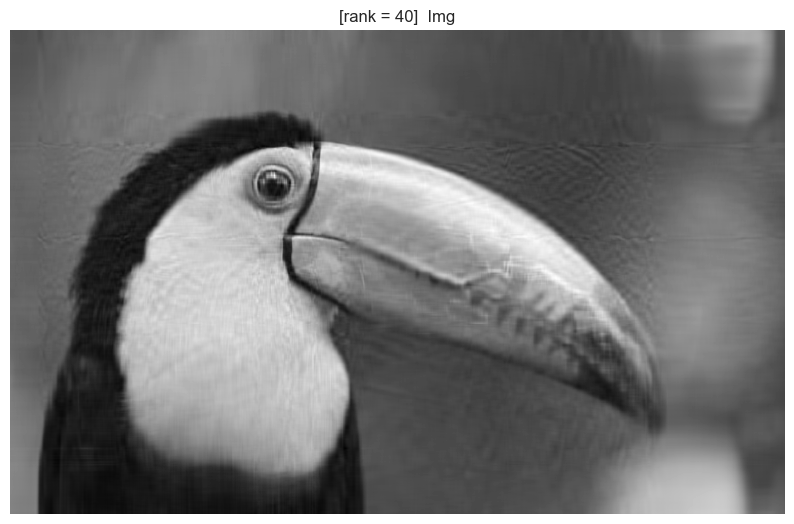

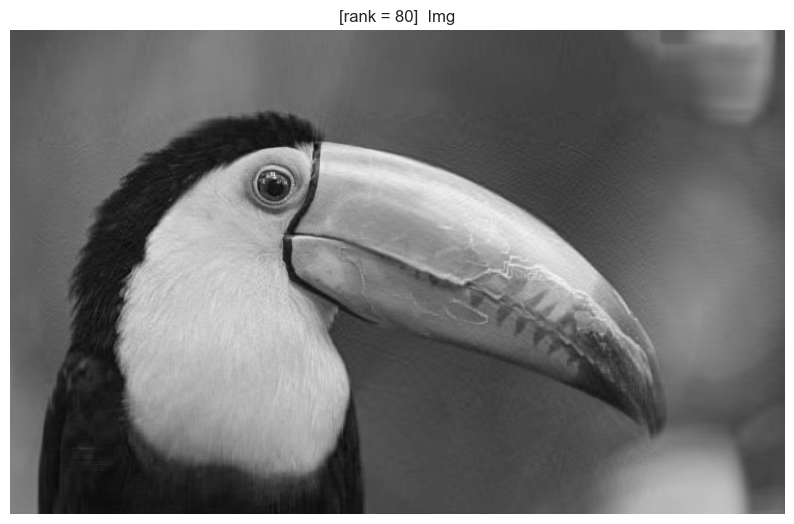

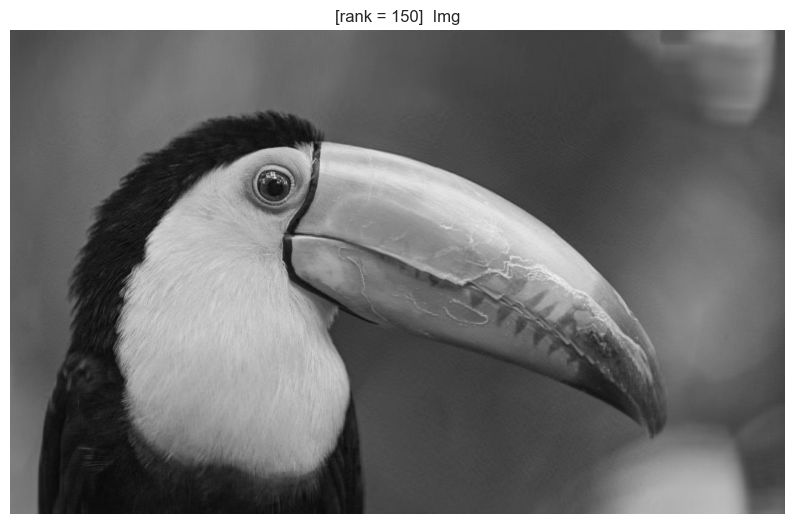

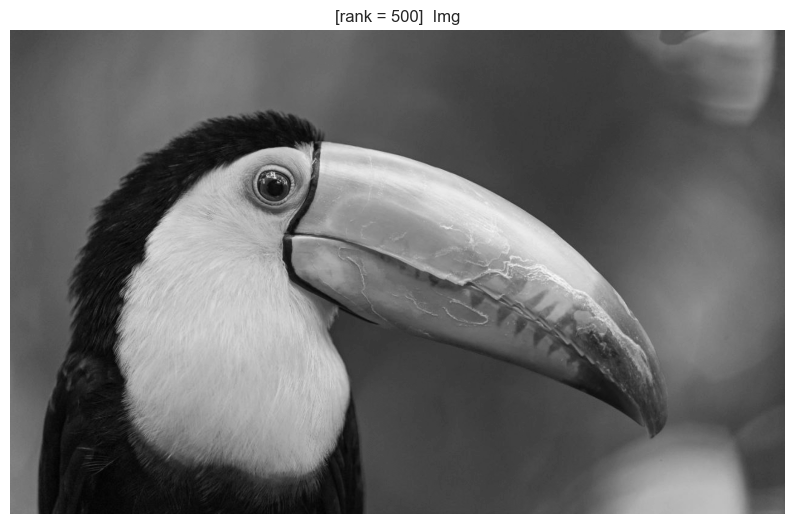

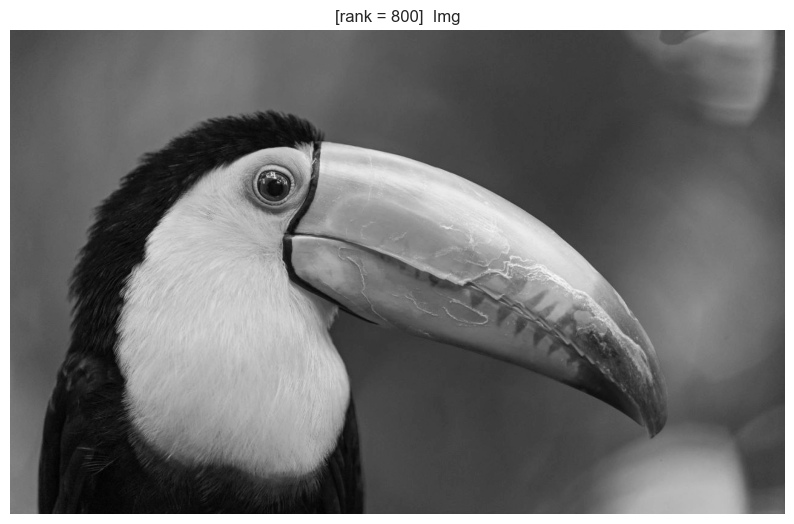

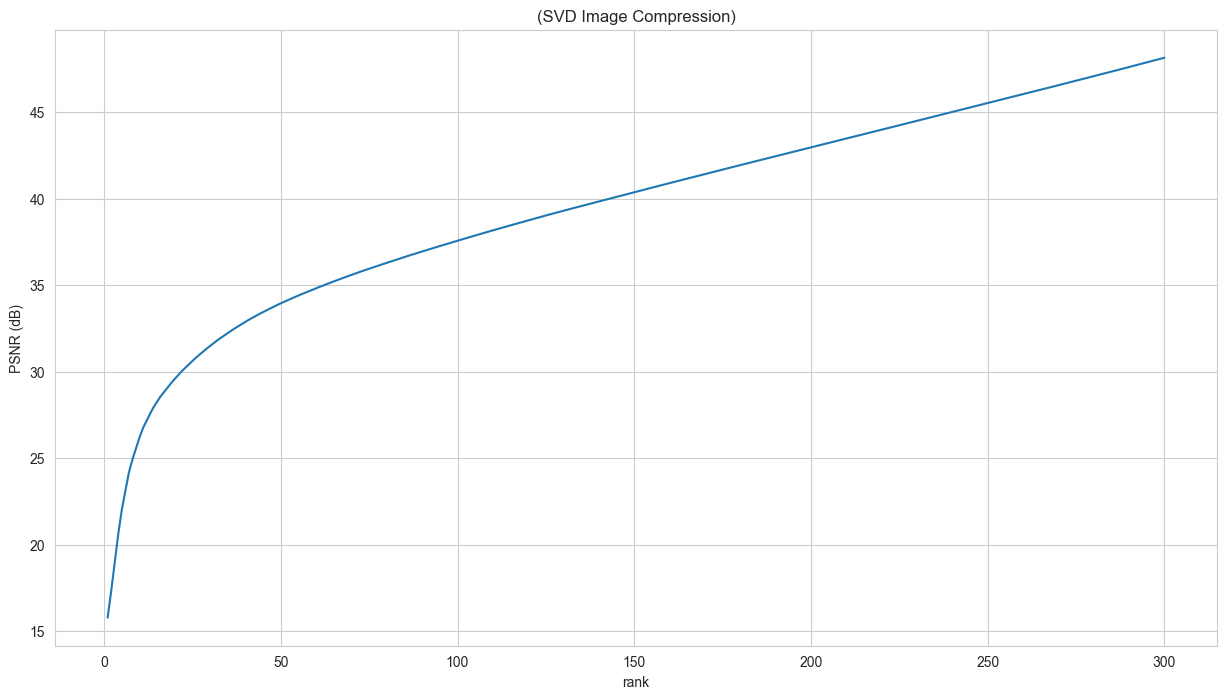

In [2]:
##Your Code start here
def rank_r_img(U,S,VT,r):
    Sigma = np.diag(S[:r])
    RHS = np.dot(Sigma, VT[:r, :])
    return np.dot(U[:,:r],RHS)

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


file_path = 'pic.jpg'
img_original = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)




U, S, VT = np.linalg.svd(img_original, full_matrices=False)
r=[10,20,30,40,80,150,500,800]


for i in r:
    rank_r_imgs = rank_r_img(U,S,VT,i)
    plt.figure(figsize=[10,20])
    plt.imshow(rank_r_imgs, cmap='gray')
    plt.title('[rank = {}]  Img'.format(i))
    plt.grid(False)
    plt.axis(False)


PSNRs = []

r = np.linspace(1,300,200,dtype=int)
for i in r:
    rank_r_imgs = rank_r_img(U,S,VT,i)
    PSNRs.append(calculate_psnr(img_original,rank_r_imgs))

plt.figure(figsize=[15,8])
plt.plot(r, PSNRs)
plt.title('(SVD Image Compression)')
plt.xlabel('rank')
plt.ylabel('PSNR (dB)')
plt.grid(True)
plt.show()

##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


Answer:
As we can see from the graphs obtained for PSNR,The rate of reduction of PSNR for Gaussian noise with increasing rank is higher than this rate for salt and pepper noise, As a result, the original image reconstruction performance for higher ranks is better for salt and pepper noise.



PSNR (salt and pepper):  38.03441641522057
PSNR (gaussian):  27.954566013637695


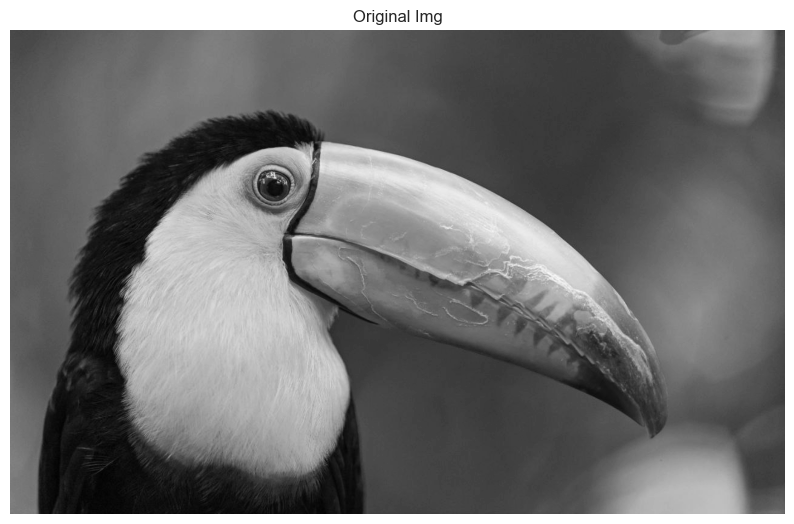

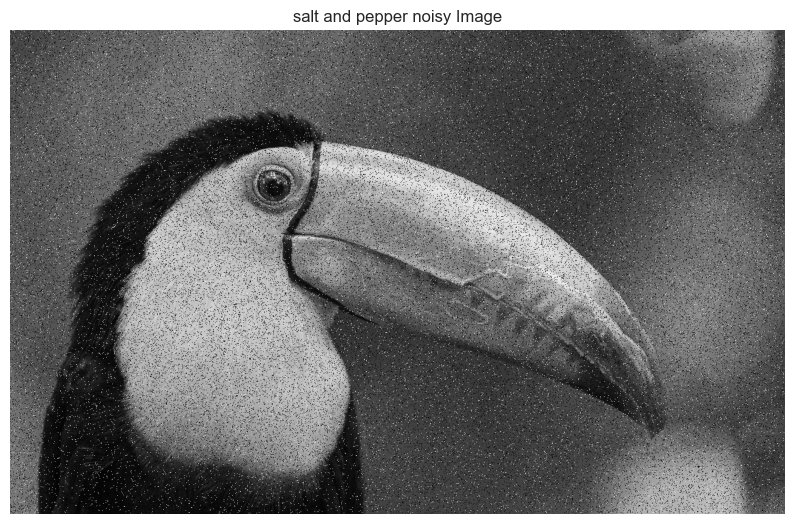

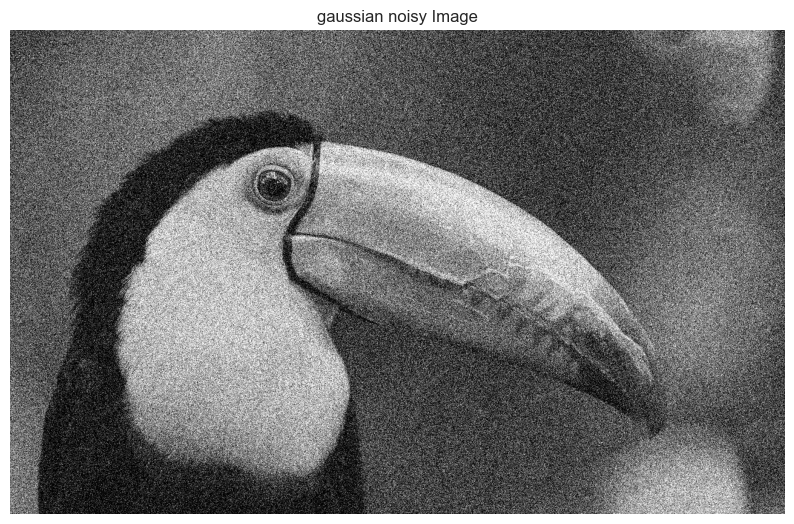

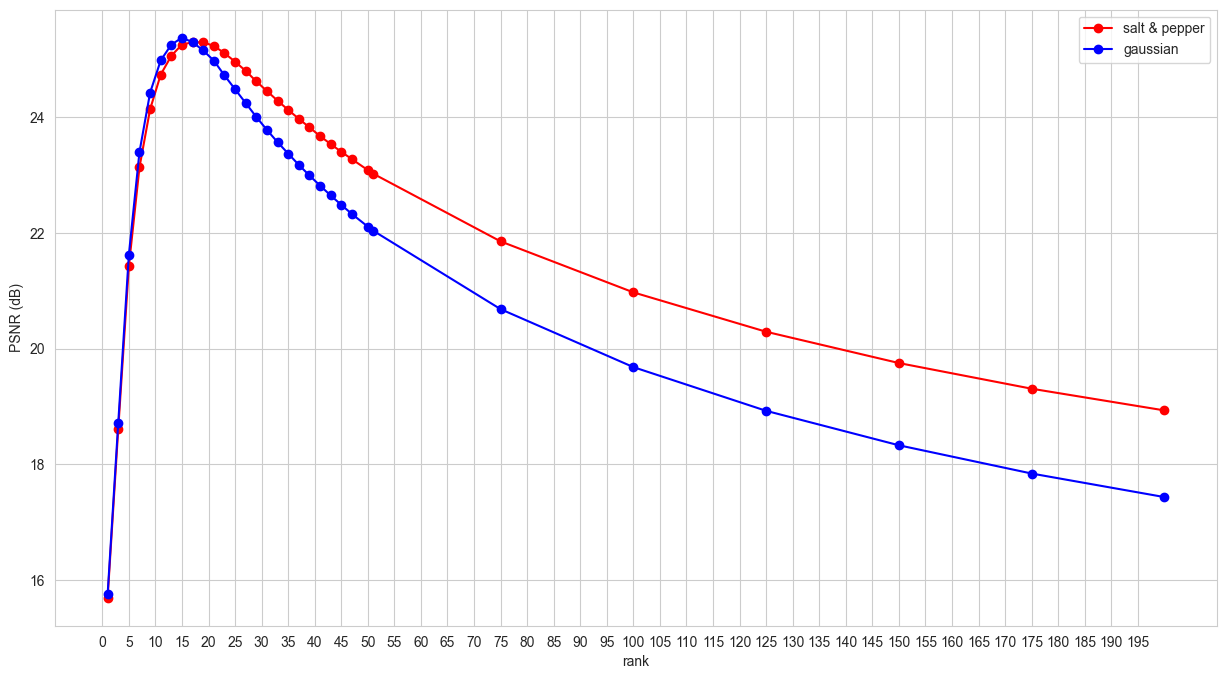

In [7]:
##Your Code start here
def add_salt_and_pepper_noise(image, noise_prob,salt_vs_pepper):
    row, col = image.shape
    num_salt = np.ceil(noise_prob * row * col * salt_vs_pepper)
    num_pepper = np.ceil(noise_prob * row * col * (1.0 - salt_vs_pepper))
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    image[salt_coords[0], salt_coords[1]] = 255
    image[pepper_coords[0], pepper_coords[1]] = 0
    return image

def add_gaussian_noise(image, mean, sigma):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

def rank_r_img(U,S,VT,r):
    Sigma = np.diag(S[:r])
    RHS = np.dot(Sigma, VT[:r, :])
    return np.dot(U[:,:r],RHS)

def denoise(noisy_img,r):
    U, S, VT = np.linalg.svd(noisy_img, full_matrices=False)
    rank_r_imgs = rank_r_img(U,S,VT,r)
    return rank_r_imgs

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr



file_path = 'pic.jpg'
img_original = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

salt_pepper_totally_prob = 0.1
salt_vs_pepper = 0.2
gaussian_mean = 0
gaussian_sigma = 50


salt_and_pepper_noisy_img = add_salt_and_pepper_noise(img_original.copy(),salt_pepper_totally_prob,salt_vs_pepper)
gaussian_noisy_img = add_gaussian_noise(img_original.copy(),gaussian_mean,gaussian_sigma)

print("PSNR (salt and pepper): ",calculate_psnr(img_original,salt_and_pepper_noisy_img))
print("PSNR (gaussian): ",calculate_psnr(img_original,gaussian_noisy_img))


plt.figure(figsize=[10,10])
plt.imshow(img_original, cmap='gray')
plt.title('Original Img')
plt.grid(False)
plt.axis(False)

plt.figure(figsize=[10,10])
plt.imshow(salt_and_pepper_noisy_img, cmap='gray')
plt.title('salt and pepper noisy Image')
plt.grid(False)
plt.axis(False)

plt.figure(figsize=[10,10])
plt.imshow(gaussian_noisy_img, cmap='gray')
plt.title('gaussian noisy Image')
plt.grid(False)
plt.axis(False)


sp_PSNRs = []
g_PSNRs = []
r = np.linspace(1,50,25,dtype=int)
r = np.append(r,np.linspace(51,200,7,dtype=int))
for i in r:
    sp_denoise = denoise(salt_and_pepper_noisy_img,i)
    sp_PSNRs.append(calculate_psnr(img_original,sp_denoise))
    g_denoise = denoise(gaussian_noisy_img,i)
    g_PSNRs.append(calculate_psnr(img_original,g_denoise))

plt.figure(figsize=[15,8])
plt.plot(r, sp_PSNRs,marker='o',color='red',label='salt & pepper')
plt.plot(r, g_PSNRs,marker='o',color='blue',label='gaussian')
plt.xlabel('rank')
plt.legend()
plt.ylabel('PSNR (dB)')
plt.grid(True)
plt.xticks(np.arange(0, 200, step=5))
plt.show()

##Your Code ends here

(-0.5, 1279.5, 799.5, -0.5)

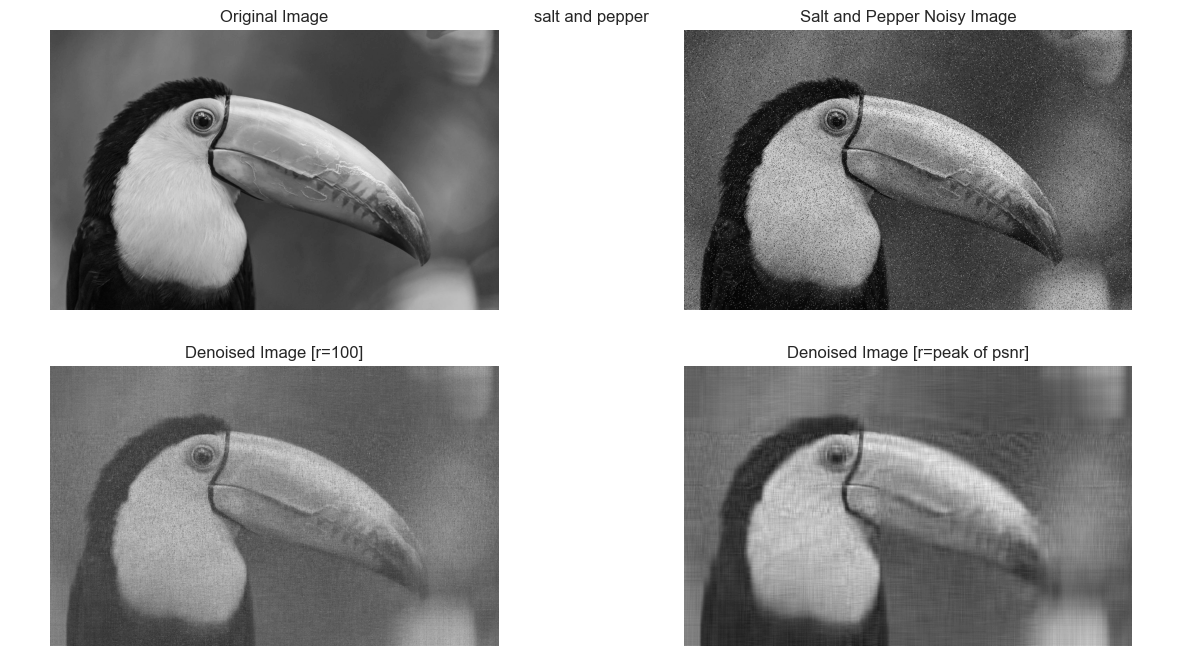

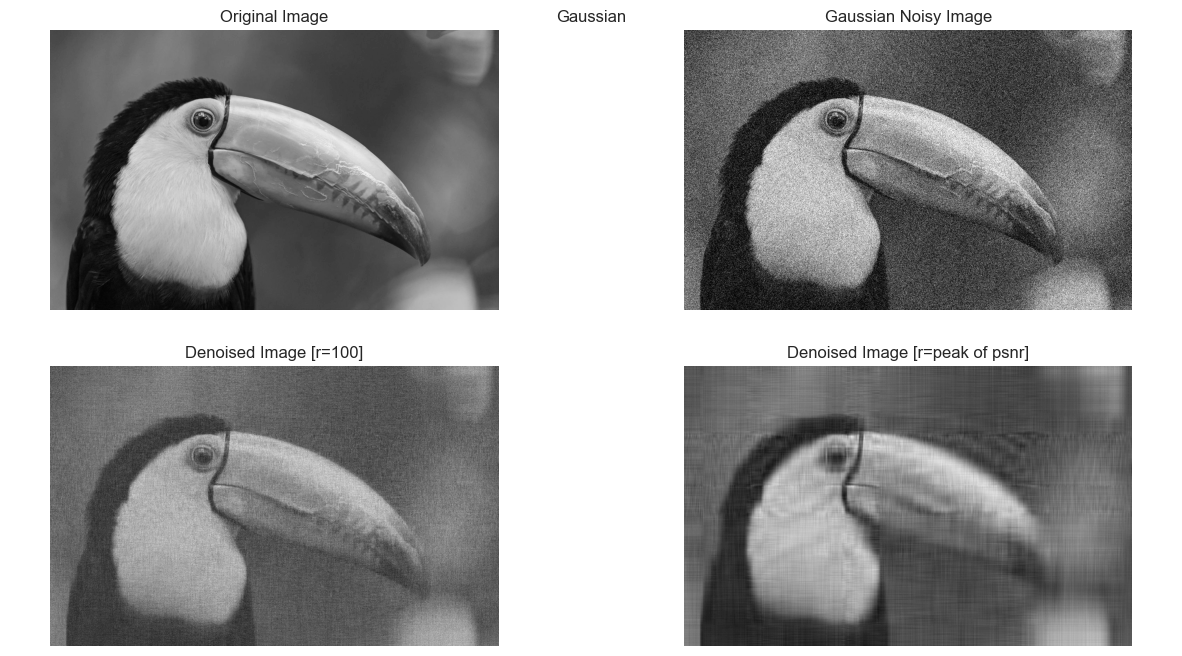

In [11]:
sp_denoise100 = denoise(salt_and_pepper_noisy_img,100)
g_denoise100 = denoise(gaussian_noisy_img,100)

sp_denoise_peak = denoise(salt_and_pepper_noisy_img,21)
g_denoise_peak = denoise(gaussian_noisy_img,15)

plt.figure(figsize=(15, 8))
plt.title('salt and pepper')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 2)
plt.imshow(salt_and_pepper_noisy_img, cmap='gray')
plt.title('Salt and Pepper Noisy Image')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 3)
plt.imshow(sp_denoise100, cmap='gray')
plt.title('Denoised Image [r=100]')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 4)
plt.imshow(sp_denoise_peak, cmap='gray')
plt.title('Denoised Image [r=peak of psnr]')
plt.grid(False)
plt.axis(False)

plt.figure(figsize=(15, 8))
plt.title('Gaussian')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.title('Original Image')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 2)
plt.imshow(gaussian_noisy_img, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 3)
plt.imshow(g_denoise100, cmap='gray')
plt.title('Denoised Image [r=100]')
plt.grid(False)
plt.axis(False)

plt.subplot(2, 2, 4)
plt.imshow(g_denoise_peak, cmap='gray')
plt.title('Denoised Image [r=peak of psnr]')
plt.grid(False)
plt.axis(False)

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


### Import Dataset

In [120]:
Datapoint = pd.read_csv('Datapoint.csv', header=None)


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

Text(0.5, 1.0, 'Correlation between various features')

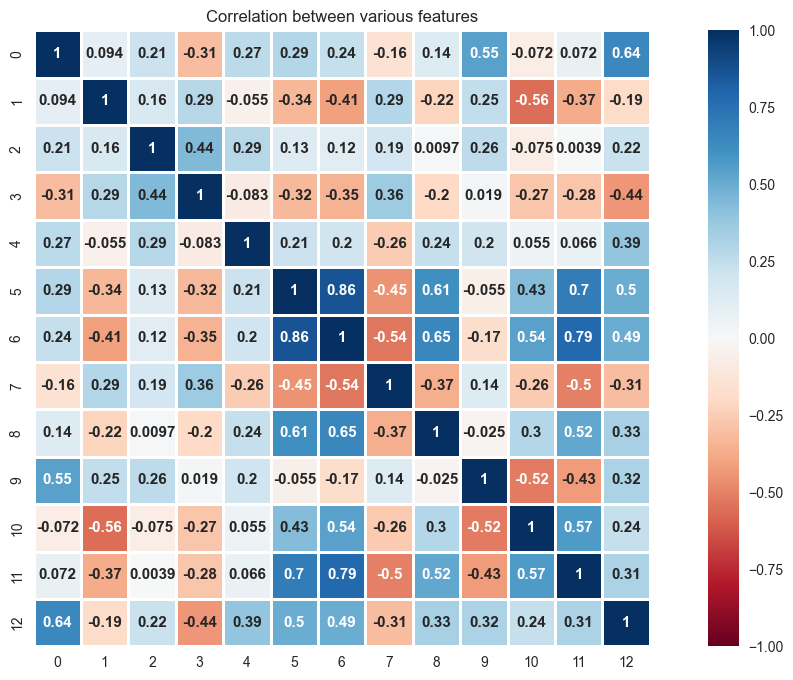

In [125]:
##Your Code start here
corr = Datapoint.corr()
plt.figure(figsize=[15,8])
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, square=True,
            annot_kws={'fontsize':11, 'fontweight':'bold'}, linewidths=0.75)
plt.title("Correlation between various features")
##Your Code ends here

According to the display of the correlation matrix, we can see that Features 5 and 6 and 11 similar characteristics above 70%, as a result, We can determine the number of principal components as :
13 - 3 + 1 = 11

###  Data Preprocessing

In [126]:
Datapoint.head()

0     1     2     3    4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     12  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

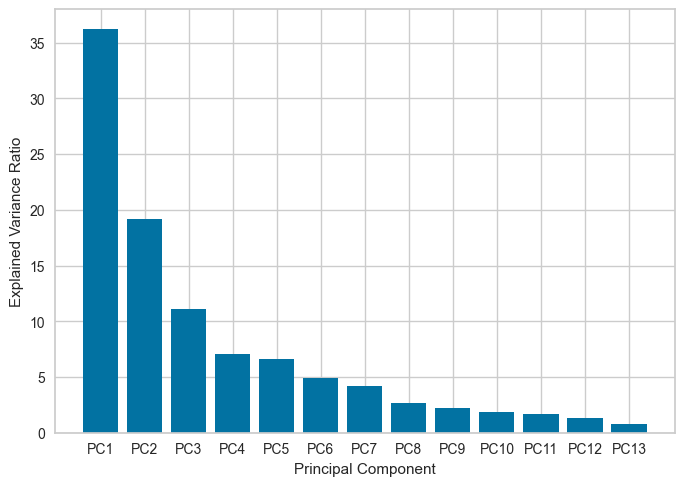

In [158]:
##Your Code start here
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datapoint)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [159]:
##Your Code start here

# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data.T)

# Calculate the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort the eigenvectors by eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)

# Select the top eigenvectors
k = 11
top_eigvecs = np.array([eig_pairs[i][1] for i in range(k)])

# Transform the data
new_data_standard = np.dot(scaled_data, top_eigvecs.T)
##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

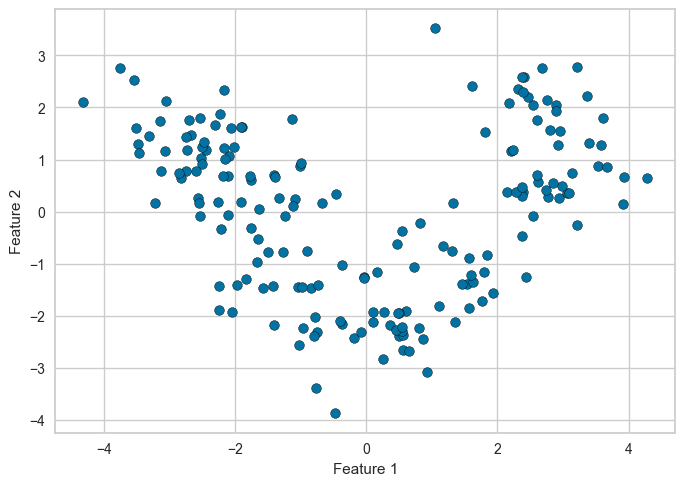

In [160]:
##Your Code start here
# Create a scatter plot of the first two features
plt.scatter(new_data_standard[:, 0], new_data_standard[:, 1], edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
##Your Code ends here

According to the above view, it probably has 3 clusters.

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




Calculate principal components and plot Explained variance by each component.

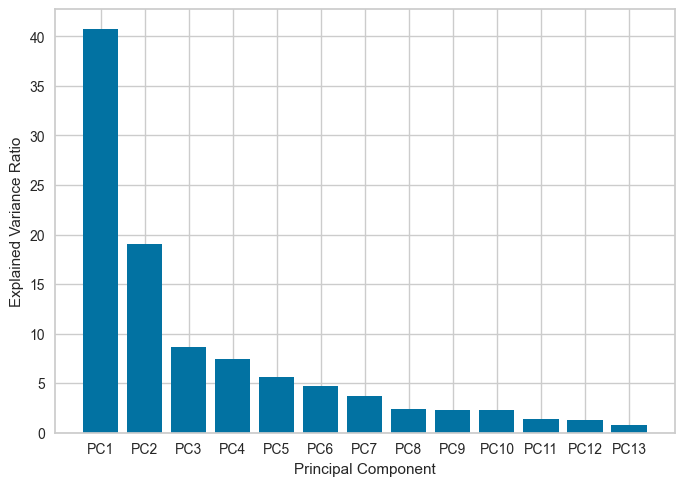

In [161]:
##Your Code start here

# Standardize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Datapoint)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.


In [162]:
##Your Code start here
# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data.T)
# Calculate the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort the eigenvectors by eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)

# Select the top eigenvectors
k = 11
top_eigvecs = np.array([eig_pairs[i][1] for i in range(k)])

# Transform the data
new_data_minmax = np.dot(scaled_data, top_eigvecs.T)
##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

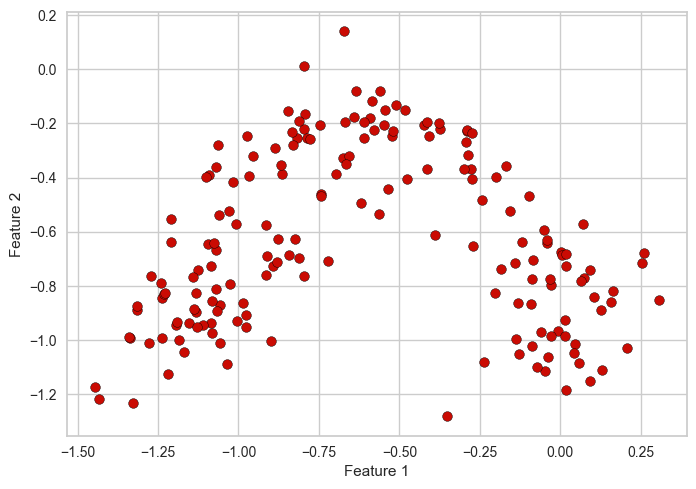

In [163]:
##Your Code start here
# Create a scatter plot of the first two features
plt.scatter(new_data_minmax[:, 0], new_data_minmax[:, 1], edgecolors='black', color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
##Your Code ends here

Tell your opinion about diffrences.

MinMaxScaler and StandardScaler are two popular methods for scaling data in machine learning. Here's a comparison of the two methods:

1. **Range of values:**
- MinMaxScaler scales the data to a fixed range, typically between 0 and 1, while StandardScaler standardizes the data by removing the mean and scaling to unit variance.
- MinMaxScaler is useful when the range of the data is known and fixed, while StandardScaler is useful when the data is normally distributed.

2. **Handling outliers:**
- MinMaxScaler is sensitive to the presence of outliers, as it compresses all inliers into a narrow range. StandardScaler is less sensitive to outliers, as it removes the mean and scales to unit variance.

3. **Interpretability:**
- MinMaxScaler preserves the original scale of the data, while StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1.

4. **Suitability for algorithms:**
- MinMaxScaler is suitable for algorithms that require features to be on a similar scale, such as neural networks. StandardScaler is suitable for algorithms that assume that the data is normally distributed, such as linear regression, logistic regression, and linear discriminant analysis.

In summary, the choice between MinMaxScaler and StandardScaler depends on the specific requirements of the machine learning algorithm and the characteristics of the data, such as the presence of outliers and the assumption of the data distribution.



### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

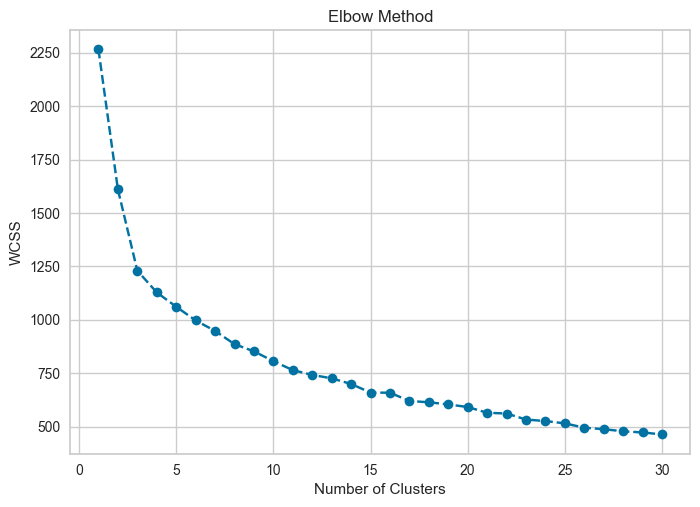

In [169]:
##Your Code start here
# Calculate the WCSS for each number of clusters
n_init = 30
N = 1+n_init
kmeans = KMeans(n_clusters=range(1, N), init='k-means++', n_init=n_init, random_state=1)
wcss = []
for k in range(1, N):
    kmeans.n_clusters = k
    kmeans.fit(new_data_standard)
    wcss.append(kmeans.inertia_)

# Plot the WCSS as a function of the number of clusters
plt.plot(range(1, N), wcss, marker = 'o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.

Inertia:
In the context of clustering, inertia is a metric used to evaluate the goodness of fit of a clustering algorithm. It is calculated as the sum of squared distances between each data point and the centroid of its assigned cluster. Inertia measures how internally coherent the clusters are; lower inertia values indicate that the clusters are more tightly bound. However, inertia alone is not sufficient to determine the optimal number of clusters, as it tends to decrease as the number of clusters increases. Therefore, it is often used in conjunction with other metrics, such as the silhouette score, to identify the appropriate number of clusters.

Silhouette Score:
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It quantifies the quality of the clusters by considering the distance between data points and the separation between clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A value close to 1 implies that the data point is appropriately clustered, while a value close to -1 suggests that the data point may be misclustered. The silhouette score is a useful metric for assessing the appropriateness of the clustering configuration and can help in determining the optimal number of clusters.

In [177]:
#You should save your final datapoints in pca_std_datapoint variable
pca_std_datapoint = new_data_standard
pca_std_datapoints = new_data_standard

In [171]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 22.33it/s]


In [172]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 19.95it/s]


Plot the **inertia** and **silhouette ** values

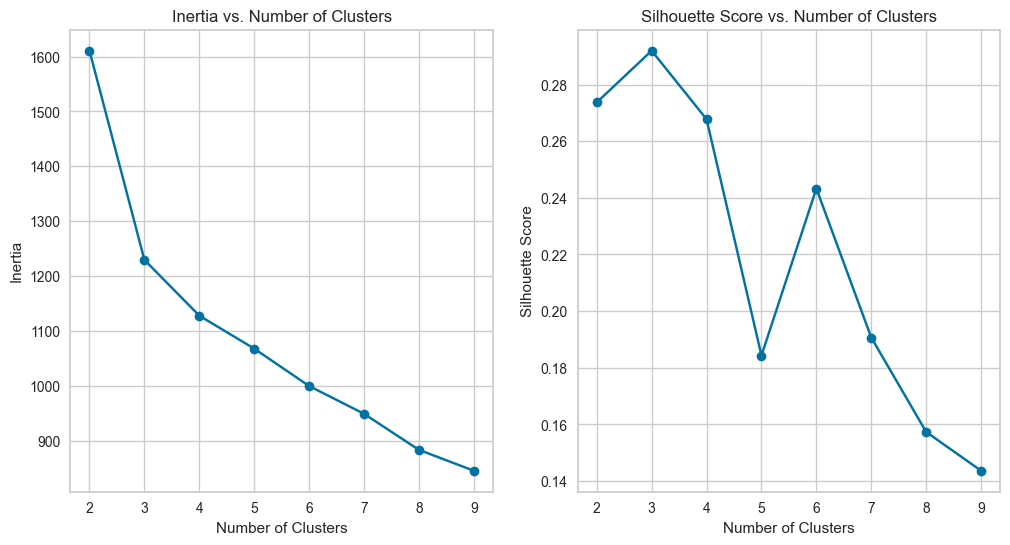

In [176]:
##Your Code start here

# Plot the inertia values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [178]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoints)


C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

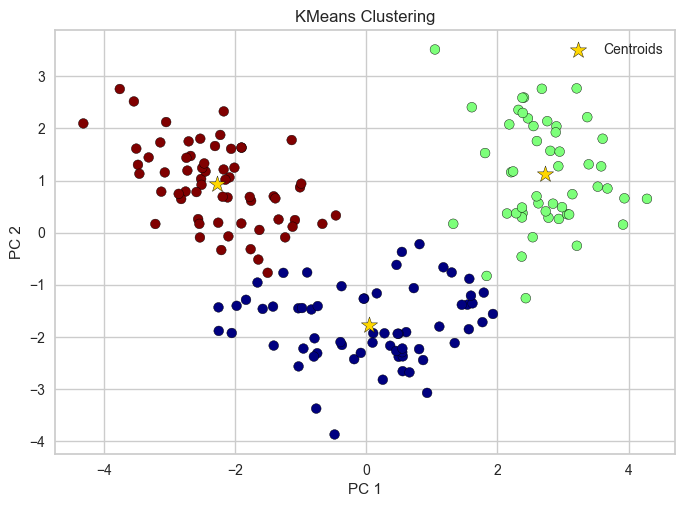

In [193]:

plt.scatter(pca_std_datapoint[:, 0], pca_std_datapoint[:, 1], c=y_predict_kmeans1, cmap="jet", edgecolors='black')

plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='*', s=150, color='Gold', label='Centroids', edgecolors='black')

# Chart details
plt.title('KMeans Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend()
plt.grid(True)
plt.show()

Do all previous steps for MinMax scaled data points.

Using the elbow method to find the optimal number of clusters

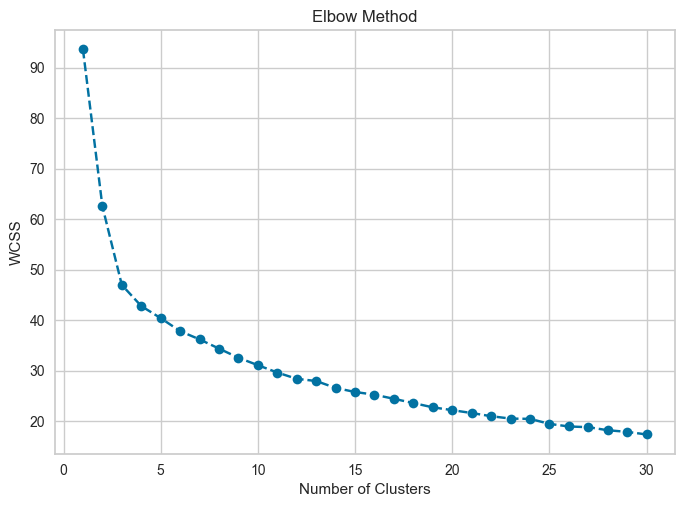

In [195]:
##Your Code start here
# Calculate the WCSS for each number of clusters
n_init = 30
N = 1+n_init
kmeans = KMeans(n_clusters=range(1, N), init='k-means++', n_init=n_init, random_state=1)
wcss = []
for k in range(1, N):
    kmeans.n_clusters = k
    kmeans.fit(new_data_minmax)
    wcss.append(kmeans.inertia_)

# Plot the WCSS as a function of the number of clusters
plt.plot(range(1, N), wcss, marker = 'o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()
##Your Code ends here

In [196]:
#You should save your final datapoints in pca_std_datapoint variable
pca_minmax_datapoint = new_data_minmax
pca_minmax_datapoints = new_data_minmax

In [197]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_minmax_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 19.54it/s]


In [198]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_minmax_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 20.33it/s]


Plot the **inertia** and **silhouette ** values

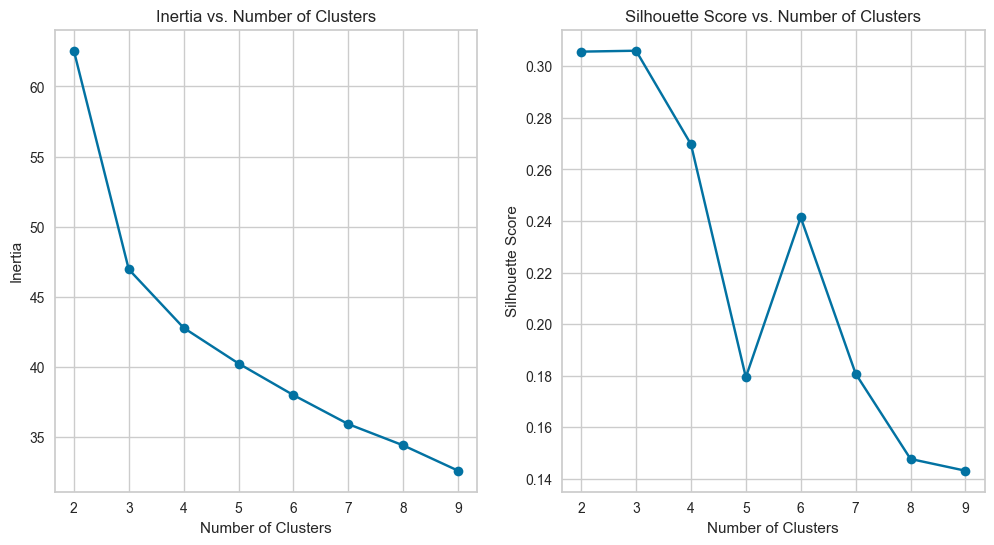

In [199]:
##Your Code start here

# Plot the inertia values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [202]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans.fit_predict(pca_minmax_datapoints)

C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

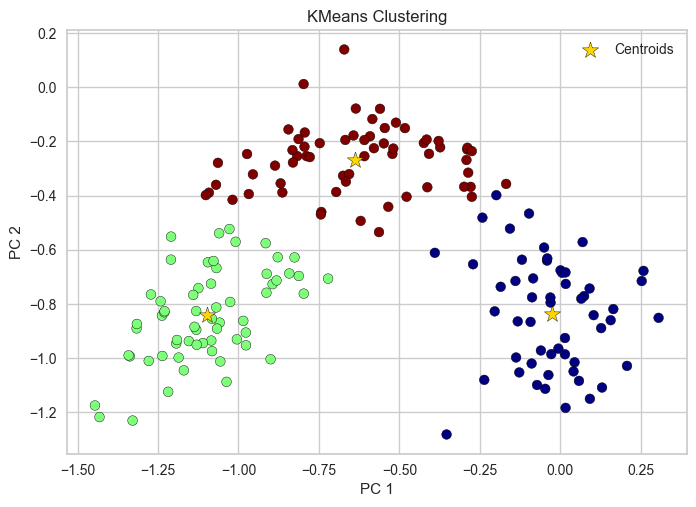

In [203]:
plt.scatter(pca_minmax_datapoint[:, 0], pca_minmax_datapoint[:, 1], c=y_predict_kmeans2, cmap="jet", edgecolors='black')

plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1], marker='*', s=150, color='Gold', label='Centroids', edgecolors='black')

# Chart details
plt.title('KMeans Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.legend()
plt.grid(True)
plt.show()

Compare the results of different scaling methods in a PCA problem

The choice of scaling method can have a significant impact on the results of a PCA problem. Here's a summary of the findings from the search results:
1. StandardScaler:
In one example, StandardScaler gave the highest performance (AUC-ROC) on a Kaggle dataset.
In another example, StandardScaler achieved the best scores in only 4 out of 16 cases.
StandardScaler is suitable for algorithms that assume that the data is normally distributed, such as linear regression, logistic regression, and linear discriminant analysis.

2. MinMaxScaler:
In one example, MinMaxScaler gave the highest performance (AUC-ROC) on a Kaggle dataset.
In another example, MinMaxScaler achieved the best scores in only 1 out of 16 cases.
MinMaxScaler is suitable for algorithms that require features to be on a similar scale, such as neural networks.

In summary, the choice of scaling method depends on the specific requirements of the machine learning algorithm and the characteristics of the data, such as the presence of outliers and the assumption of the data distribution. It is recommended to experiment with multiple scaling techniques to determine the optimal method for a given problem